In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect, create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
Base= automap_base()
Base.prepare(engine, reflect=True)

In [7]:
Measurement= Base.classes.measurement
Station= Base.classes.station

In [8]:
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

recent_date = recent_date[0]

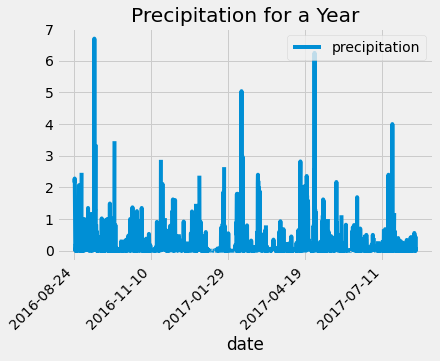

In [10]:
year_prior = dt.datetime.strptime(recent_date, "%Y-%m-%d")- dt.timedelta(days=365)


m_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_prior).all()


precip_df = pd.DataFrame(m_query,columns= ['date', 'precipitation'])


precip_df.set_index('date', inplace= True)

precip_df = precip_df.sort_values(by= 'date', ascending= True)


precip_df.plot(title= "Precipitation for a Year")
plt.legend(loc='upper right')
plt.savefig('Images/Precipitation.png')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()


In [11]:
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
total_stations= session.query(Measurement.station).distinct().count()
print(f'Total Stations: {total_stations}')

Total Stations: 9


In [13]:
act_stations= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(act_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
most_act_station= act_stations[0][0]

print(most_act_station)

USC00519281


In [15]:
most_act_temps= session.query(func.min(Measurement.tobs),
                              func.max(Measurement.tobs),
                              func.avg(Measurement.tobs)).filter(Measurement.station == most_act_station).all()

print(f"Active Station Temps")
print(f"Low: {most_act_temps[0][0]}")
print(f"High: {most_act_temps[0][1]}")
print(f"Average: {round(most_act_temps[0][2], 1)}")

Active Station Temps
Low: 54.0
High: 85.0
Average: 71.7


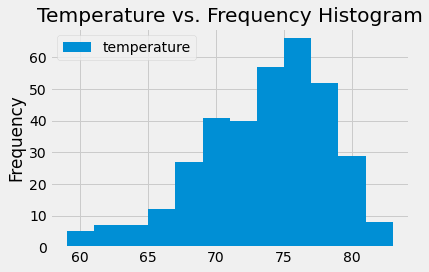

In [16]:
most_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temps_station= most_temps_station[0]

temp_observations = session.query( Measurement.tobs).filter(Measurement.date >= year_prior).filter(Measurement.station == most_temps_station).all()
temp_observations = pd.DataFrame(temp_observations, columns=['temperature'])

temp_observations.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")
plt.tight_layout()
plt.savefig("Images/TemperaturevsFrequency.png")
plt.show()

In [17]:
session.close()